<a href="https://colab.research.google.com/github/SamkitShah55/SamkitShah55/blob/main/Price_Prediction_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dragon Real Estate - Price Predictor**
  
  --An Real World End to End ML Project

In [2]:
import pandas as pd

In [6]:
housing = pd.read_csv("/Data2.csv")

In [7]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
housing.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# **use of info**
* To check Entries about rows and columns 
* To check missing data so that we can handle that data
* Fun fact : Humne Sabse chota wala dataset liya hai jo ki only 506 entries ka hai 
* Real world dataset will be in millions 

* But the method will be the same for both , so dont take tension and lets move forward





In [ ]:
housing['CHAS'].value_counts()
# Gives Counts of attribute/feature

0    471
1     35
Name: CHAS, dtype: int64

In [9]:
housing.describe()
# Gives all statistical analysis

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283409,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.701438,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
%matplotlib inline 
# Means we have to see graphs here only

In [ ]:
import matplotlib.pyplot as plt

# **Plotting Histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdb96affd0>,
      dtype=object)

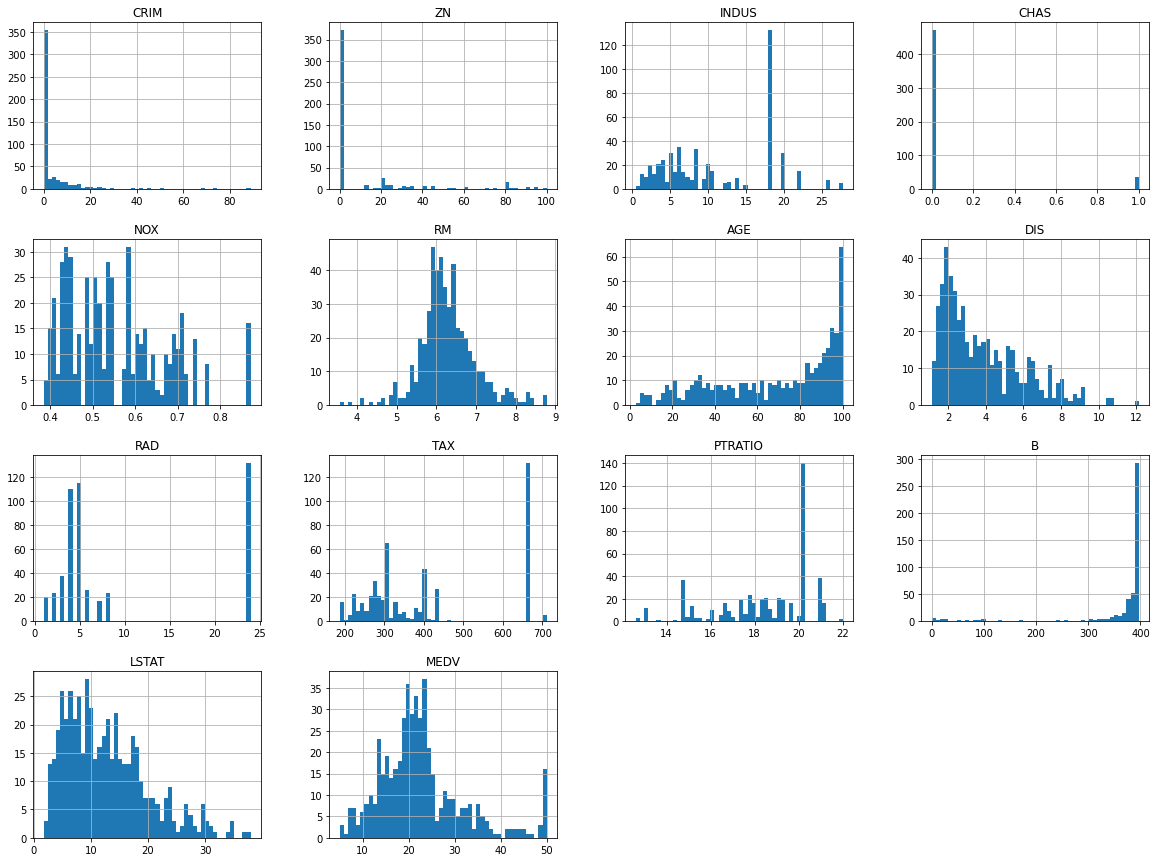

In [ ]:
housing.hist(bins=50, figsize=(20,15))

# **Train-Test Splitting**

In [ ]:
# This was for learning purpose
# Creating a Function for training testing and splitting
"""
import numpy as np

def split_train_test( data, test_ratio):
  np.random.seed(42) # Most important step : Because we are using random function for value and our function each time while running will give new 
  # random values to train and we dont want our model to train on test values as it will train according to data. 
  # This seed(42) function sets the random value

  shuffled= np.random.permutation(len(data))
  print(shuffled)

  test_set_size = int(len(data) * test_ratio) # 80% training ko and 20% testing ko sab lete hai

  test_indices = shuffled[:test_set_size] # aakhri wale testing ko

  train_indices = shuffled[test_set_size:]
  
  return data.iloc[train_indices], data.iloc[test_indices]

  """

In [ ]:
# train_set, test_set = split_train_test(housing,0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [ ]:
# print(f"Rows in train set : {len(train_set)}\n Rows in test set: {len(test_set)}\n")

In [ ]:
# ABHI tak ka jo function ka kam tha wo hum SK LEARN MODULE SE BHI KR SAKTE HAI
# No worry we have learn how to write functions
# Now lets move to sklearn to do the same thing


# **SK learn Implentations for train-test Splitting**

In [32]:
from sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(housing , test_size= 0.2 , random_state= 42) 
# Ab samj gye honge ap upar wale function ka kam
print(f"Rows in train set : {len(train_set)}\n Rows in test set: {len(test_set)}\n")

Rows in train set : 404
 Rows in test set: 102



In [33]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
# There should be equal distribution of for example in 'CHAS' there should be equal number of 0's and 1's in both training and testing dataset
# our train -test should represent whole populations

# example of alien (hair are blonde and white)

# for this we will use "Stratified Sampling "

# **Stratified Sampling**

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
SS_split = StratifiedShuffleSplit(n_splits =1 , test_size = 0.2 , random_state= 42)
for train_index , test_index in SS_split.split(housing, housing['CHAS']):  # Split function = Generate indices to split data into training and test set
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [35]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [36]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [37]:
housing = strat_train_set.copy()  # Real Project pr kam krte waqt before going to next step for correlation analysis
# You should take copy of train data set

# **LOOKING FOR CORRELATIONS**

In [ ]:
 # corr_matrix = housing.corr() 

# Compute pairwise correlation of columns, excluding NA/null values.
"""
Parameters

method : {'pearson', 'kendall', 'spearman'} or callable
    
    
    Method of correlation:


pearson : standard correlation coefficient

kendall : Kendall Tau correlation coefficient

spearman : Spearman rank correlation

callable: callable with input two 1d ndarrays

and returning a float. Note that the returned matrix from corr

will have 1 along the diagonals and will be symmetric

regardless of the callable's behavior.

min_periods : int, optional

Minimum number of observations required per pair of columns
to have a valid result. Currently only available for Pearson
"""

"\nParameters\n\nmethod : {'pearson', 'kendall', 'spearman'} or callable\n   \n   \n   Method of correlation:\n\n\npearson : standard correlation coefficient\n\nkendall : Kendall Tau correlation coefficient\n\nspearman : Spearman rank correlation\n\ncallable: callable with input two 1d ndarrays\n\nand returning a float. Note that the returned matrix from corr\n\nwill have 1 along the diagonals and will be symmetric\n\nregardless of the callable's behavior.\n\nmin_periods : int, optional\n\nMinimum number of observations required per pair of columns\nto have a valid result. Currently only available for Pearson\n"

In [13]:
corr_matrix = housing.corr()

In [14]:
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.691745
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [ ]:
# Here MEDV 1 gives strong Positive correlations 
# here it shows that RM is also strongly correlated with MEDV

# here it shows that MEDV is strongly negatively correalted with Lstat

# As we have seen strong correlations 
# now we will see plotting with them only

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4114b40a10>,
      dtype=object)

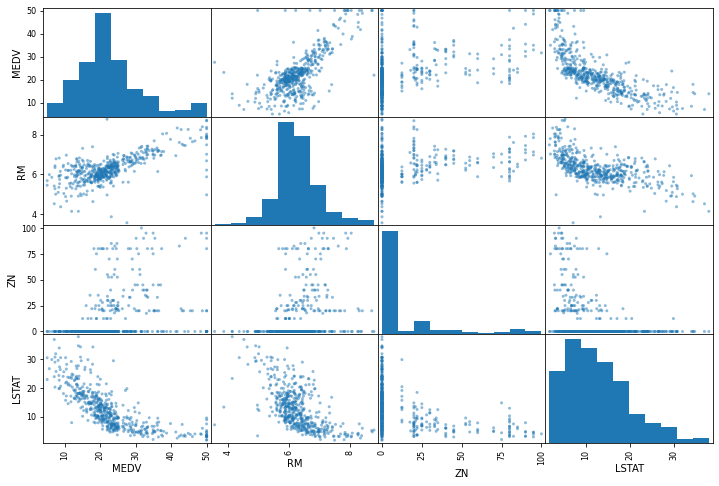

In [15]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM" , "ZN" , "LSTAT"]
scatter_matrix(housing[attributes] , figsize=(12,8))

###**Advantage of using Scatter Plot is that we can remove Outliers from our dataset**

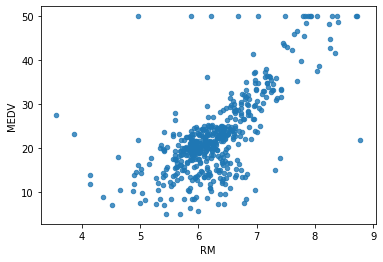

In [16]:
# To look individual plots 

housing.plot(kind= "scatter" , x="RM" , y="MEDV" , alpha = 0.8)  # alpha shows density or darkness of plots

# **Trying Out Attribute Combinations**

In [17]:
housing["TAX_RM"]= housing["TAX"]/housing["RM"]  # Here we have created one new attribute by using "tax" and "Rm"
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_RM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [18]:
corr_matrix = housing.corr()
corr_matrix["MEDV"].sort_values(ascending= False)

# here we got 
# strong negatively correlation of MEDV and TAXRM

MEDV       1.000000
RM         0.691745
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAX_RM    -0.538949
LSTAT     -0.737663
Name: MEDV, dtype: float64

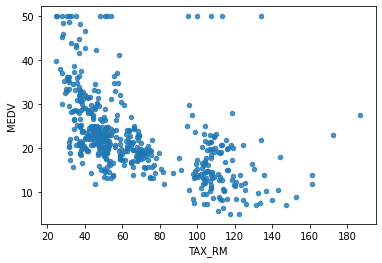

In [19]:
housing.plot(kind = "scatter" , x="TAX_RM" , y= "MEDV", alpha = 0.8)

In [52]:
# Creating a different features and labels
housing = strat_train_set.drop("MEDV" , axis =1)
housing_labels = strat_train_set["MEDV"].copy()

# **Missing Attributes in Data Sets** 

In [ ]:
'''
To take care of missing attributes you have three options:
1. Get rid of missing data points (if less...)
2. Get rid of whole attribute  (if it does not find correlation with our main attribute)
3. Set the value to some value (0, mean or median )
'''

In [20]:
a= housing.dropna(subset=["RM"])   # option 1
a.shape
#note that the original housing dataframe wil remain unchanged

(501, 15)

In [21]:
housing.drop("RM" , axis=1)  # option 2 
# Note that there is no RM column and also note that the original housing dataframe wil remain unchanged

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_RM
0,0.00632,18.0,2.31,0,0.538,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,41.407553
502,0.04527,0.0,11.93,0,0.573,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,44.607843
503,0.06076,0.0,11.93,0,0.573,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,39.134174
504,0.10959,0.0,11.93,0,0.573,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,40.182514


In [22]:
# option 3

median = housing['RM'].median()

In [24]:
# Pandas Library helps us to fill cleverly our data into missing value
housing["RM"].fillna(median)
# Note that the original housing dataframe wil remain unchanged

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [38]:
housing.describe() # Before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_RM
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278311,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.760812
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711641,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.543603
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.015779
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,55.229977
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.673976
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


# **SK learn Class for missing data (SimpleImputer Class)**

In [39]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy = 'median')  # Estimator from scikit learn library
imputer.fit(housing)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.21100000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 2.11500000e+01, 5.52299769e+01])

In [41]:
imputer.statistics_.shape  # sare attributes k liye class ne missing value nikal k rakh di hai 

(15,)

In [42]:
X = imputer.transform(housing)

In [43]:
# Creating a New Data Frame 
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [44]:
housing_tr.describe()
# Now we have RM class with 404 values jo ki phele 399 values pr tha upar after train data set liya tab

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAX_RM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.277478,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,22.509406,67.605727
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.707252,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,9.385531,31.377987
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,5.000000,24.645639
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,16.600000,45.168593
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,21.150000,55.229977
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,25.000000,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,50.000000,187.026116


# **Scikit-learn Design**

In [45]:
# important link for understanding of scikit learn principles
# 1. Estimators
# 2. transformers
# 3. predictors

# Go read the article about scikit learn principles
https://medium.com/analytics-vidhya/scikit-learn-design-with-easy-explanation-b3bcb060580

SyntaxError: ignored

# **Feature Scaling**

Primarily there are two types of feature scaling Methods:
1. **Min - Max Scaling ( Normalization)**
    = ( value - min ) / (Max - Min )

    SK learn provides a class called **MinMax Scaler** for this
2. **Standardizations** 
    = ( Value - Mean ) / standard deviation

    Sklearn provides a class called **Standard Scaler** for this 

# **Creating a Pipeline**

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([  # creates alist of transforms and estimators 
    ('imputer' , SimpleImputer(strategy = "median")),
    # You can add as many as you want in your pipeline
    ('std_scaler' , StandardScaler())
])


In [88]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [89]:
housing_num_tr.shape # Gives an Numpy array

(404, 14)

# **Selecting a Desired Model for Dragon Real estates**

In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_num_tr ,housing_labels)

LinearRegression()

In [62]:
some_data = housing.iloc[:5]

In [63]:
some_labels = housing_labels.iloc[:5]

In [64]:
prepared_data = my_pipeline.transform(some_data)  # sending my some data to go through my pipeline

In [65]:
model.predict(prepared_data)

array([22.6842494 , 26.89364386, 18.83372004, 24.90996056, 24.05215319])

In [66]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

# **Evaluating a Model**

In [68]:
# Root Mean Squared Error Method
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [69]:
lin_mse 

18.24463574640097

# Bahot bada error aa rha hai toh hum dusra model try krte hai

In [70]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_num_tr ,housing_labels)

DecisionTreeRegressor()

In [71]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [72]:
mse

0.0

# 0 depicts that we have overfit the model

# **Using better evaluations Techniques - Cross Validations**

In [73]:
# 1 2 3 4 5 6 7 8 9 10 
# for example start me 1 ko test dataset liya baki sab ko train kiya aur 1 ko test kiya aur usme k error dekhe 
# same procedure 10 tak kiya 

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring= "neg_mean_squared_error", cv = 10) # neg= negative)
rmse_scores = np.sqrt(-scores)

In [74]:
rmse_scores

array([3.98338011, 5.36306247, 4.68281758, 4.36566426, 3.8495779 ,
       4.74865771, 5.21658413, 3.84291556, 3.66820801, 5.67432815])

In [80]:
def print_scores(scores):
  print("Scores: " , scores)
  print("Mean: ", scores.mean())
  print("Standard deviation : ", scores.std())

In [81]:
print_scores(rmse_scores)

Scores:  [3.98338011 5.36306247 4.68281758 4.36566426 3.8495779  4.74865771
 5.21658413 3.84291556 3.66820801 5.67432815]
Mean:  4.539519586752617
Standard deviation :  0.6744390402774227


# **trying out one more model - Random forest Regressor**

In [79]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_num_tr ,housing_labels)

RandomForestRegressor()

# **Saving the Model**

In [85]:

from joblib import dump, load
dump (model, 'Dragon.joblib')

['Dragon.joblib']

# **Testing a Model on Test Data**

In [91]:
X_test = strat_test_set.drop("MEDV",axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [92]:
final_rmse

2.9464823660312867

In [97]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23992556, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034, -0.51162936])

# **Using the Model**

In [95]:
from joblib import dump, load
model = load('Dragon.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.23992556, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034, -0.51162936]])
model.predict(features)

array([22.266])